In [92]:
import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import array
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error

In [93]:
key="ae85c4e6a01eab6fa176c2dab99e679ae40a27a7"

In [94]:
df = pdr.get_data_tiingo('TSLA', api_key=key)
df.to_csv('TSLA.csv')
df= pd.read_csv('TSLA.csv')

In [95]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,TSLA,2015-08-31 00:00:00+00:00,249.06,254.95,245.51,245.77,4700232,249.06,254.95,245.51,245.77,4700232,0.0,1.0
1,TSLA,2015-09-01 00:00:00+00:00,238.63,246.00,236.97,240.34,5454765,238.63,246.00,236.97,240.34,5454765,0.0,1.0
2,TSLA,2015-09-02 00:00:00+00:00,247.69,247.88,239.78,245.14,4629174,247.69,247.88,239.78,245.14,4629174,0.0,1.0
3,TSLA,2015-09-03 00:00:00+00:00,245.57,252.08,245.00,252.06,4194772,245.57,252.08,245.00,252.06,4194772,0.0,1.0
4,TSLA,2015-09-04 00:00:00+00:00,241.93,244.09,238.20,240.89,3689153,241.93,244.09,238.20,240.89,3689153,0.0,1.0


In [96]:
data_training = df[df['date']<'2019-01-01'].copy()

In [97]:
data_test = df[df['date']>='2019-01-01'].copy()

In [98]:
data_training = data_training[['close','high','low','volume','splitFactor']]

In [99]:
data_training

,close,high,low,volume,splitFactor
0,249.06,254.9500,245.510,4700232,1.0
1,238.63,246.0000,236.970,5454765,1.0
2,247.69,247.8800,239.780,4629174,1.0
3,245.57,252.0800,245.000,4194772,1.0
4,241.93,244.0900,238.200,3689153,1.0
...,...,...,...,...,...
835,295.39,314.5000,295.195,5559913,1.0
836,326.09,326.9700,294.090,8163138,1.0
837,316.13,322.1717,301.500,8575133,1.0
838,333.87,336.2400,318.410,9938992,1.0


In [101]:
data_test = data_test[['close','high','low','volume','splitFactor']]

In [102]:
data_test

,close,high,low,volume,splitFactor
840,310.12,315.13,298.8000,11658648,1.0
841,300.36,309.40,297.3800,6965184,1.0
842,317.69,318.00,302.7300,7394116,1.0
843,334.96,336.74,317.7508,7551225,1.0
844,335.35,344.01,327.0200,7008516,1.0
...,...,...,...,...,...
1252,2001.83,2021.99,1857.0600,20611796,1.0
1253,2049.98,2095.49,2025.0500,21489559,1.0
1254,2014.20,2129.00,1927.5200,20063621,1.0
1255,2023.34,2027.95,1968.0000,10658893,1.0


In [103]:
scaler =MinMaxScaler()
data_training =scaler.fit_transform(data_training)
data_test =scaler.fit_transform(data_test)

In [106]:
x_train = []
y_train = []
x_test = []
y_test = []

In [107]:
for i in range(60, data_training.shape[0]):
    x_train.append(data_training[i-60:i])
    y_train.append(data_training[i,0])
for i in range(60, data_test.shape[0]):   
    x_test.append(data_test[i-60:i])
    y_test.append(data_test[i,0])

In [108]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_test, y_test = np.array(x_test), np.array(y_test)

In [109]:
model=Sequential()

model.add(LSTM(units=60, activation = 'relu',return_sequences=True, input_shape= (x_train.shape[1],5)))
          
model.add(LSTM(units=60, activation = 'relu', return_sequences = True))
          
model.add(LSTM(units=40, activation = 'relu',return_sequences = True))
       
model.add(LSTM(units=40, activation = 'relu',return_sequences = False))
     
model.add(Dense(units = 1))
          

In [110]:
model.compile(loss='mean_squared_error',optimizer='adam', metrics=['accuracy'])

In [111]:
model.fit(x_train,y_train,epochs=50,batch_size=7)

Epoch 1/50
112/112 [==============================] - 6s 52ms/step - loss: 0.0535 - accuracy: 0.0013
Epoch 2/50
112/112 [==============================] - 6s 51ms/step - loss: 0.0108 - accuracy: 0.0026
Epoch 3/50
112/112 [==============================] - 6s 53ms/step - loss: 0.0092 - accuracy: 0.0026
Epoch 4/50
112/112 [==============================] - 6s 56ms/step - loss: 0.0095 - accuracy: 0.0026
Epoch 5/50
112/112 [==============================] - 7s 59ms/step - loss: 0.0071 - accuracy: 0.0026
Epoch 6/50
112/112 [==============================] - 10s 87ms/step - loss: 0.0064 - accuracy: 0.0026
Epoch 7/50
112/112 [==============================] - 10s 87ms/step - loss: 0.0050 - accuracy: 0.0026
Epoch 8/50
112/112 [==============================] - 9s 77ms/step - loss: 0.0051 - accuracy: 0.0026
Epoch 9/50
112/112 [==============================] - 10s 87ms/step - loss: 0.0049 - accuracy: 0.0026
Epoch 10/50
112/112 [==============================] - 10s 87ms/step - loss: 0.0036 - ac

In [112]:
score = model.evaluate(x_train, y_train, batch_size=32)
print ('LSTM test accuracy:', score[1])
score = model.evaluate(x_test, y_test, batch_size=32)
print ('LSTM test accuracy:', score[1])

25/25 [==============================] - 1s 24ms/step - loss: 0.0012 - accuracy: 0.0026
LSTM test accuracy: 0.0025641026441007853
12/12 [==============================] - 0s 23ms/step - loss: 0.0010 - accuracy: 0.0056
LSTM test accuracy: 0.005602241028100252


In [113]:
y_pred = model.predict(x_test)

y_pred =y_pred*scale
y_test =y_test*scale

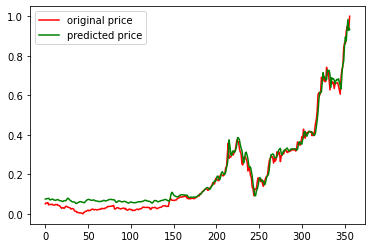

In [114]:
plt.plot(y_test, color= 'red', label ='original price')
plt.plot(y_pred, color= 'green', label ='predicted price')
plt.legend()
plt.show()

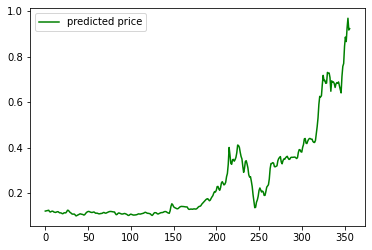

In [120]:
scaler = MinMaxScaler()
scaler.fit(y_pred)
y = scaler.inverse_transform(y_pred)
plt.plot(y, color= 'green', label ='predicted price')
plt.legend()
plt.show()

In [121]:
model.save("model.h5")
print("Saved model to disk")

Saved model to disk
